In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import callbacks

In [ ]:
x = np.zeros((2880,250,250,3), dtype=np.float32)
y = np.zeros((2880,1), dtype=np.int32)
dir=["Asagi","Bekko_Hi","Bekko_Ki","Bekko_Shiro","Ghosiki","Goromo","Kohaku","Kujaku","Ogon_Orenji","Ogon_Platinum","Ogon_Yamabuki","Showa_Sanshoku","Shusui","Taisho_Sanke","Tancho","Utsuri_Hi","Utsuri_Ki","Utsuri_Shiro"]
count = 0
for i in range(0,18):
  dir_folder = "drive/MyDrive/resize2/"+dir[i]
  for j in os.listdir(dir_folder):
    x[count][::][::][::] = cv2.cvtColor(cv2.imread(dir_folder + "/" + j ,cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
    y[count]=int(i)
    count = count + 1

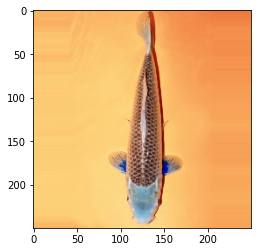

In [ ]:
Img_data = x[0].reshape(1,250,250,3)
plt.imshow(x[0].astype(np.int32))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0
y_train = np_utils.to_categorical(y_train,18)
y_test = np_utils.to_categorical(y_test,18)
x_val, x_test_train, y_val, y_test_train = train_test_split(x_test,y_test, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (250,250,3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 250, 250, 32)      416       
                                                                 
 conv2d_25 (Conv2D)          (None, 250, 250, 32)      4128      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 64)      8256      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 62, 62, 128)      

In [ ]:
opt = SGD(learning_rate=0.008, decay=1e-6, momentum=0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 50, batch_size = 16, validation_data = (x_val, y_val))

Epoch 1/50
126/126 [==============================] - 11s 79ms/step - loss: 2.8952 - accuracy: 0.0526 - val_loss: 2.8970 - val_accuracy: 0.0463
Epoch 2/50
126/126 [==============================] - 10s 76ms/step - loss: 2.8927 - accuracy: 0.0486 - val_loss: 2.8973 - val_accuracy: 0.0449
Epoch 3/50
126/126 [==============================] - 10s 76ms/step - loss: 2.8915 - accuracy: 0.0580 - val_loss: 2.8957 - val_accuracy: 0.0521
Epoch 4/50
126/126 [==============================] - 9s 75ms/step - loss: 2.8841 - accuracy: 0.0709 - val_loss: 2.8587 - val_accuracy: 0.0897
Epoch 5/50
126/126 [==============================] - 9s 75ms/step - loss: 2.7113 - accuracy: 0.1190 - val_loss: 2.4976 - val_accuracy: 0.2547
Epoch 6/50
126/126 [==============================] - 9s 74ms/step - loss: 2.3766 - accuracy: 0.2019 - val_loss: 2.1261 - val_accuracy: 0.3155
Epoch 7/50
126/126 [==============================] - 9s 75ms/step - loss: 2.0914 - accuracy: 0.2817 - val_loss: 1.7893 - val_accuracy: 0.4

In [ ]:
model_json = model.to_json()
with open('drive/MyDrive/model_config_v3.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('drive/MyDrive/model_compare_weights_v3.h5')
model.save("drive/MyDrive/model_v3.h5")